### Choose a dataset to Visulaize
* Import needed libraries 
* Load your own dataset

In [225]:
import pandas as pd 
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


In [226]:
df = pd.read_csv('HR_Missing_Vslues.csv')

In [227]:
# Data cleaning from the previous lab

df['Employee_Name'] = df['Employee_Name'].fillna(df['EmpID'])
salary_avg_by_P = df.groupby('Position')['Salary'].transform('mean')
df['Salary'] = df['Salary'].fillna(salary_avg_by_P)
salary_avg_by_D= df.groupby('Department')['Salary'].transform('mean')
df['Salary'] = df['Salary'].fillna(salary_avg_by_D)
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())
df['DOB'] = df['DOB'].fillna('Unknown')
df['Sex'] = df['Sex'].fillna('Unknown')
df = df.drop('DateofTermination',axis=1)
df['ManagerID'] = df['ManagerID'].fillna(method='bfill')
avg_of_Department_Absences= df.groupby('Department')['Absences'].transform('mean')
df['Absences'] = df['Absences'].fillna(avg_of_Department_Absences)

### Descriptive Analysis
* Write the codes for summarizing the dataset (head, tail, shape, describe, info, etc).
* Write your findings of the summarizations (write at least 10 findings).

In [228]:
df.head()
# we see alote of RaceDesc type

,Employee_Name,EmpID,Salary,PositionID,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,Department,ManagerName,ManagerID,RecruitmentSource,Absences
0,"Adinolfi, Wilson K",10026,62506.0,19,Production Technician I,07/10/83,M,Single,White,7/5/2011,Production,Michael Albert,22.0,LinkedIn,1.0
1,"Ait Sidi, Karthikeyan",10084,104437.0,27,Sr. DBA,05/05/75,M,Married,White,3/30/2015,IT/IS,Simon Roup,4.0,Indeed,17.0
2,"Akinkuolie, Sarah",10196,64955.0,20,Production Technician II,09/19/88,F,Married,White,7/5/2011,Production,Kissy Sullivan,20.0,LinkedIn,3.0
3,"Alagbe,Trina",10088,64991.0,19,Production Technician I,Unknown,F,Married,White,1/7/2008,Production,Elijiah Gray,16.0,Indeed,15.0
4,10069,10069,50825.0,19,Production Technician I,09/08/89,F,Divorced,White,7/11/2011,Production,Webster Butler,39.0,Google Search,2.0


In [229]:
df.tail()
# i see some ManagerID are sames thats maining there is a duplcate ManagerID

,Employee_Name,EmpID,Salary,PositionID,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,Department,ManagerName,ManagerID,RecruitmentSource,Absences
306,"Woodson, Jason",10135,65893.0,20,Production Technician II,05/11/85,M,Single,White,7/7/2014,Production,Kissy Sullivan,20.0,LinkedIn,13.000000
307,"Ybarra, Catherine",10301,48513.0,19,Production Technician I,Unknown,F,Single,Asian,9/2/2008,Production,Brannon Miller,12.0,Google Search,4.000000
308,10010,10010,220450.0,6,CIO,Unknown,F,Single,White,4/10/2010,IT/IS,Janet King,2.0,Employee Referral,16.000000
309,"Zhou, Julia",10043,89292.0,9,Data Analyst,02/24/79,F,Single,White,3/30/2015,IT/IS,Simon Roup,4.0,Employee Referral,10.276596
310,10271,10271,45046.0,19,Production Technician I,08/17/78,F,Widowed,Asian,9/29/2014,Production,David Stanley,14.0,LinkedIn,2.000000


In [230]:
df.shape
# 311 rows , 15 columns

(311, 15)

In [231]:
df.info()
# no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employee_Name      311 non-null    object 
 1   EmpID              311 non-null    int64  
 2   Salary             311 non-null    float64
 3   PositionID         311 non-null    int64  
 4   Position           311 non-null    object 
 5   DOB                311 non-null    object 
 6   Sex                311 non-null    object 
 7   MaritalDesc        311 non-null    object 
 8   RaceDesc           311 non-null    object 
 9   DateofHire         311 non-null    object 
 10  Department         311 non-null    object 
 11  ManagerName        311 non-null    object 
 12  ManagerID          311 non-null    float64
 13  RecruitmentSource  311 non-null    object 
 14  Absences           311 non-null    float64
dtypes: float64(3), int64(2), object(10)
memory usage: 36.6+ KB


In [232]:
df.describe()
# all employses have at least 1 Absences 

,EmpID,Salary,PositionID,ManagerID,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,67745.246246,16.845659,14.627010,10.105004
std,89.922189,21508.259716,6.223419,8.126169,5.642005
min,10001.000000,45046.000000,1.000000,1.000000,1.000000
25%,10078.500000,55534.357143,18.000000,10.000000,5.000000
50%,10156.000000,63108.000000,19.000000,14.000000,9.908108
75%,10233.500000,70487.500000,20.000000,19.000000,15.000000
max,10311.000000,220450.000000,30.000000,39.000000,20.000000


In [233]:
df.describe(exclude='number').T
# every name is a unique 
# most of them are single
# most of them are white
# most of them work as Production Technician I 


,count,unique,top,freq
Employee_Name,311,311,"Adinolfi, Wilson K",1
Position,311,32,Production Technician I,137
DOB,311,277,Unknown,31
Sex,311,3,F,141
MaritalDesc,311,5,Single,137
RaceDesc,311,6,White,187
DateofHire,311,101,1/10/2011,14
Department,311,6,Production,209
ManagerName,311,21,Michael Albert,22
RecruitmentSource,311,9,Indeed,87


In [234]:
df.duplicated().sum()
#no duplcated rows

0

In [235]:
davg_salary_by_pos = df.groupby('Position')['Salary'].mean()
davg_salary_by_pos.sort_values(ascending=False)
# CIO take highest salary income 

Position
CIO                             220450.000000
Director of Sales               180000.000000
IT Director                     178000.000000
Director of Operations          170500.000000
IT Manager - Infra              157000.000000
IT Manager - Support            138888.000000
Principal Data Architect        120000.000000
BI Director                     110929.000000
Database Administrator          107124.750000
Sr. DBA                         104437.000000
Sr. Accountant                  102859.000000
Software Engineer                97088.444444
BI Developer                     95465.000000
Enterprise Architect             93859.222222
Data Analyst                     93859.222222
IT Manager - DB                  93859.222222
Data Architect                   93859.222222
Sr. Network Engineer             93256.250000
Data Analyst                     89932.571429
Senior BI Developer              81584.000000
Software Engineering Manager     77692.000000
Production Manager       

In [236]:
df.groupby('Sex')['Sex'].count()
# most of the employes are Female

Sex
F          141
M          108
Unknown     62
Name: Sex, dtype: int64

In [237]:
Department_Absences = df.groupby('Department')['Absences'].mean()
Department_Absences.sort_values(ascending=False)
# moste Department_Absences from sales department 

Department
Sales                   11.548387
IT/IS                   10.276596
Executive Office        10.000000
Production               9.908108
Admin Offices            9.571429
Software Engineering     9.444444
Name: Absences, dtype: float64

### Univariate Visualization
* Plot two Charts
* Provide each charts with at least two insights 

<Axes: xlabel='Salary', ylabel='Count'>

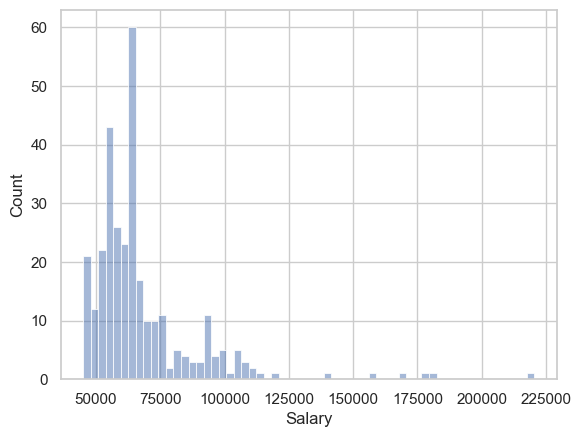

In [238]:
sns.histplot(x ='Salary' ,bins = 60,alpha = 0.5 ,  data =df)


Text(0.5, 1.0, 'Distribution of Sex in each Dep')

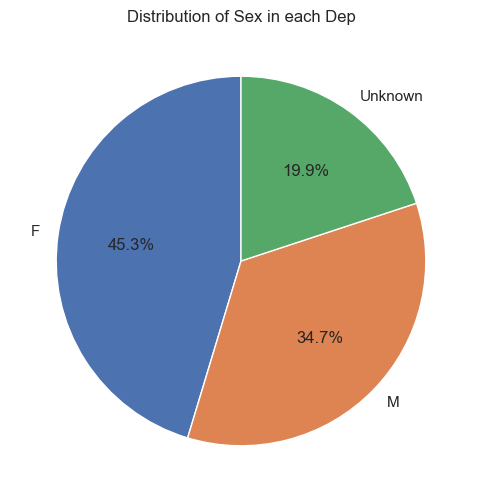

In [239]:

gender = category_sex.index
count = category_sex.values
plt.figure(figsize=(6, 6))
plt.pie(count, labels=gender, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sex in each Dep')


#### Write your insghts here

In [240]:
# most employes there salary is between 50000 to 75000

#### Write your insghts here

In [241]:
# most employes are Female

### Bivariate Visualization 
* Plot two Charts
* Provide each charts with at least two insights 

Text(0, 0.5, 'Count')

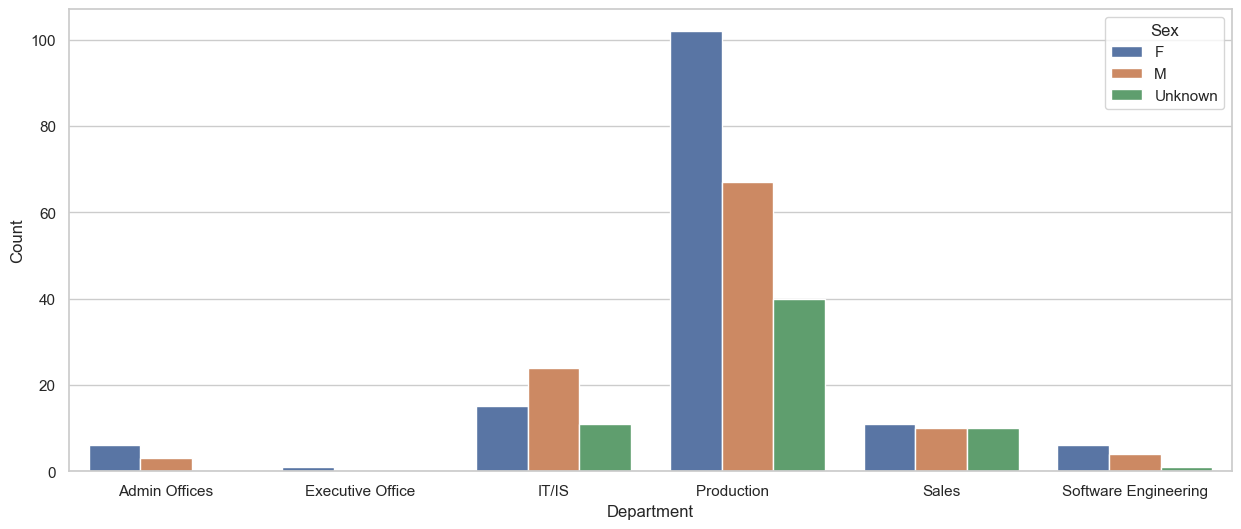

In [242]:
counts = df.groupby(['Department', 'Sex']).size().reset_index(name='Count')

plt.figure(figsize=(15, 6))
sns.barplot(x='Department', y='Count', hue='Sex', data=counts)
plt.xlabel('Department')
plt.ylabel('Count')

#### Write your insghts here

In [243]:
#selse departmant have equl male and femael

#### Write your insghts here

In [244]:
#IT/IS departmant have male more then female male

In [245]:
#prodiction departmant have female more then  male

### Multivariate Visualization 
* Plot two Charts
* Provide each charts with at least two insights 

In [246]:
#Bubble Chart
#Scatter Plot


SyntaxError: invalid syntax (3341457442.py, line 1)

#### Write your insghts here

#### Write your insghts here